In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
import random

**Connecting to Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Joining the paths of all the sets with the main directory**

In [3]:
import os
base_dir = '/content/drive/MyDrive/FloodNet Challenge @ EARTHVISION 2021 - Track 1'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')

train_label_dir = os.path.join(train_dir, 'Labled')
train_unlabel_dir = os.path.join(train_dir, 'Unlabeled')
train_l_flood_dir = os.path.join(train_label_dir, 'Flooded')
train_l_flood_image_dir = os.path.join(train_l_flood_dir, 'image')
train_l_flood_mask_dir = os.path.join(train_l_flood_dir, 'mask')
train_l_nf_dir =  os.path.join(train_label_dir, 'Non-Flooded')
train_l_nf_image_dir = os.path.join(train_l_nf_dir, 'image')
train_l_nf_mask_dir = os.path.join(train_l_nf_dir, 'mask')
train_ul_image_dir = os.path.join(train_unlabel_dir, 'image')
valid_image_dir = os.path.join(validation_dir, 'image')

**Listing out the number of images in each training set along with image list**

In [4]:
f_l_img_dir = "/content/drive/MyDrive/FloodNet Challenge @ EARTHVISION 2021 - Track 1/Train/Labeled/Flooded/image"
img_list = os.listdir(f_l_img_dir)
img_list.sort()
f_l_mask_dir = "/content/drive/MyDrive/FloodNet Challenge @ EARTHVISION 2021 - Track 1/Train/Labeled/Flooded/mask"
mask_list = os.listdir(f_l_mask_dir)
mask_list.sort()
train_l_nf_image_dir = "/content/drive/MyDrive/FloodNet Challenge @ EARTHVISION 2021 - Track 1/Train/Labeled/Non-Flooded/image"
nf_image_list = os.listdir(train_l_nf_image_dir)
nf_image_list.sort()
train_l_nf_mask_dir = "/content/drive/MyDrive/FloodNet Challenge @ EARTHVISION 2021 - Track 1/Train/Labeled/Non-Flooded/mask"
nf_mask_list = os.listdir(train_l_nf_mask_dir)
nf_mask_list.sort()
train_ul_image_dir = "/content/drive/MyDrive/FloodNet Challenge @ EARTHVISION 2021 - Track 1/Train/Unlabeled/image"
ul_image_list = os.listdir(train_ul_image_dir)
ul_image_list.sort()
num_images = len(os.listdir(f_l_img_dir))
num_masks = len(os.listdir(f_l_mask_dir))
num_nf_images = len(os.listdir(train_l_nf_image_dir))
num_nf_masks = len(os.listdir(train_l_nf_mask_dir))
num_ul_images = len(os.listdir(train_ul_image_dir))
print("Total number of training images are: ", num_images)
print(img_list)
print("Total number of training labelled masks are: ", num_masks)
print(mask_list)

Total number of training images are:  51
['10165.jpg', '10166.jpg', '6279.jpg', '6614.jpg', '6615.jpg', '6618.jpg', '6703.jpg', '6704.jpg', '6706.jpg', '6707.jpg', '6716.jpg', '7199.jpg', '7202.jpg', '7240.jpg', '7243.jpg', '7261.jpg', '7266.jpg', '7267.jpg', '7273.jpg', '7289.jpg', '7298.jpg', '7317.jpg', '7321.jpg', '7325.jpg', '7330.jpg', '7331.jpg', '7332.jpg', '7357.jpg', '7362.jpg', '7364.jpg', '7372.jpg', '7405.jpg', '7414.jpg', '7418.jpg', '7428.jpg', '7434.jpg', '7463.jpg', '7466.jpg', '7473.jpg', '7485.jpg', '7488.jpg', '7523.jpg', '7524.jpg', '7556.jpg', '7571.jpg', '7587.jpg', '7594.jpg', '8379.jpg', '8408.jpg', '9000.jpg', '9003.jpg']
Total number of training labelled masks are:  51
['10165_lab.png', '10166_lab.png', '6279_lab.png', '6614_lab.png', '6615_lab.png', '6618_lab.png', '6703_lab.png', '6704_lab.png', '6706_lab.png', '6707_lab.png', '6716_lab.png', '7199_lab.png', '7202_lab.png', '7240_lab.png', '7243_lab.png', '7261_lab.png', '7266_lab.png', '7267_lab.png', '727

In [5]:
print("Total number of non-flooded training images are: ", num_nf_images)
print(nf_image_list)
print("Total number of non-flooded training masks are: ", num_nf_masks)
print(nf_mask_list)

Total number of non-flooded training images are:  347
['10175.jpg', '10176.jpg', '10687.jpg', '10811.jpg', '10817.jpg', '10819.jpg', '10828.jpg', '10836.jpg', '10837.jpg', '10840.jpg', '6332.jpg', '6338.jpg', '6348.jpg', '6359.jpg', '6368.jpg', '6370.jpg', '6386.jpg', '6393.jpg', '6395.jpg', '6397.jpg', '6413.jpg', '6421.jpg', '6426.jpg', '6430.jpg', '6437.jpg', '6447.jpg', '6454.jpg', '6455.jpg', '6458.jpg', '6459.jpg', '6463.jpg', '6464.jpg', '6465.jpg', '6477.jpg', '6478.jpg', '6512.jpg', '6535.jpg', '6540.jpg', '6549.jpg', '6555.jpg', '6556.jpg', '6564.jpg', '6585.jpg', '6586.jpg', '6589.jpg', '6595.jpg', '6600.jpg', '6623.jpg', '6628.jpg', '6646.jpg', '6649.jpg', '6651.jpg', '6656.jpg', '6667.jpg', '6682.jpg', '6692.jpg', '6693.jpg', '6727.jpg', '6731.jpg', '6734.jpg', '6735.jpg', '6742.jpg', '6747.jpg', '6750.jpg', '6773.jpg', '6788.jpg', '6792.jpg', '6802.jpg', '6804.jpg', '6808.jpg', '6812.jpg', '6824.jpg', '6829.jpg', '6832.jpg', '6836.jpg', '6838.jpg', '6839.jpg', '6842.jpg',

In [6]:
print("Total number of unlabelled training images are: ", num_ul_images)
print(ul_image_list)

Total number of unlabelled training images are:  1047
['10168.jpg', '10170.jpg', '10171.jpg', '10172.jpg', '10179.jpg', '10180.jpg', '10181.jpg', '10182.jpg', '10184.jpg', '10300.jpg', '10566.jpg', '10806.jpg', '10810.jpg', '10818.jpg', '10820.jpg', '10821.jpg', '10825.jpg', '10826.jpg', '10827.jpg', '10834.jpg', '10835.jpg', '10841.jpg', '11723.jpg', '6287.jpg', '6334.jpg', '6335.jpg', '6340.jpg', '6341.jpg', '6344.jpg', '6346.jpg', '6347.jpg', '6350.jpg', '6351.jpg', '6352.jpg', '6354.jpg', '6358.jpg', '6360.jpg', '6361.jpg', '6363.jpg', '6364.jpg', '6365.jpg', '6367.jpg', '6369.jpg', '6372.jpg', '6373.jpg', '6374.jpg', '6375.jpg', '6376.jpg', '6379.jpg', '6381.jpg', '6384.jpg', '6385.jpg', '6387.jpg', '6388.jpg', '6398.jpg', '6399.jpg', '6402.jpg', '6403.jpg', '6404.jpg', '6407.jpg', '6408.jpg', '6409.jpg', '6411.jpg', '6414.jpg', '6415.jpg', '6416.jpg', '6422.jpg', '6424.jpg', '6427.jpg', '6431.jpg', '6433.jpg', '6435.jpg', '6438.jpg', '6442.jpg', '6443.jpg', '6444.jpg', '6446.jpg'

**Defining variables**

In [7]:
im_width = 128
im_height = 128
border = 5

**Image and Mask arrays**

In [8]:
X = np.zeros((len(img_list), im_height, im_width, 3), dtype=np.float32)
y = np.zeros((len(mask_list), im_height, im_width, 3), dtype=np.float32)

**Loading images into an array and scaling each and every image**

In [28]:
from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import img_to_array, load_img
for n, id_ in tqdm_notebook(enumerate(img_list), total=len(img_list)):
    # Load images
    img = load_img(f_l_img_dir+"/"+id_, grayscale=True)
    img_arr = img_to_array(img)
    img_arr = resize(img_arr, (128, 128, 3), mode = 'constant', preserve_range = True)
    X[n] = img_arr
   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/51 [00:00<?, ?it/s]

****

**Loading masks into an array and scaling each and every mask**

In [29]:
for n, id_ in tqdm_notebook(enumerate(mask_list), total=len(mask_list)):
   # Load masks
    mask = img_to_array(load_img(f_l_mask_dir+"/"+id_, grayscale=True))
    mask = resize(mask, (28, 28, 2), mode = 'constant', preserve_range = True)
    y[n] = mask


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/51 [00:00<?, ?it/s]

We can do the same with the other training and validation sets using the above pproch to load an array of images and we can show the image with its mask below

**Image and Mask**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: No contour levels were found within the data range.
  if __name__ == '__main__':


Text(0.5, 1.0, ' Mask')

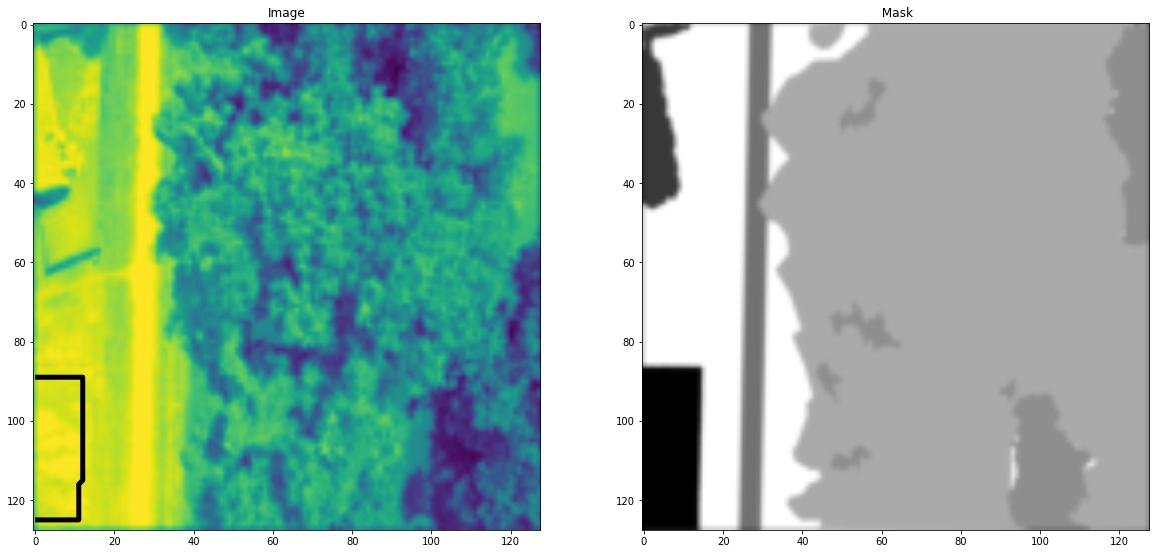

In [ ]:
ix = random.randint(0, len(img_list))
has_mask = y[ix].max() > 0 # salt indicator

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 15))

ax1.imshow(X[ix, ..., 0],interpolation = 'bilinear')
if has_mask: # if salt
    # draw a boundary(contour) in the original image separating salt and non-salt areas
    ax1.contour(y[ix].squeeze(), colors = 'k', linewidths = 5, levels = [0.5])
ax1.set_title('Image')

ax2.imshow(y[ix].squeeze(), cmap = 'gray', interpolation = 'bilinear')
ax2.set_title(' Mask')

In [9]:
from keras_preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

**Forming Train and Validation Set generators**

In [10]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 1843 images belonging to 2 classes.


In [11]:
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 450 images belonging to 1 classes.


In [12]:
!pip install git+https://github.com/qubvel/segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-3z9fl9o9
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-3z9fl9o9
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 50 kB 6.0 MB/s 
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any.whl size=33810 sha256=34fc372068944681c1c18211807b50095be0b4957ab720a797fe0639877eb6d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-8vur5oaq/wheels/02/cd/18/61c0bbb8766acfec68f9d20618886b7b38dfeeb95865b6ba00
Successfully built segmentation-models


In [13]:
from segmentation_models import Unet
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from keras.models import model_from_json

from keras.layers import Input, Conv2D, Reshape
from keras.models import Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
BACKBONE = 'resnet34'

Segmentation Models: using `keras` framework.
(40, 128, 128, 3) (11, 128, 128, 3) (40, 128, 128, 3) (11, 128, 128, 3)


In [14]:
from keras.utils import to_categorical 
y_test = to_categorical(y_test, dtype ="uint8")
y_train = to_categorical(y_train, dtype ="uint8")

In [15]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
 
# For VGG16 this is the input size
#width, height = 224, 224

In [16]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                                        

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(train_generator, batch_size=32, epochs=5, validation_data=validation_generator)

Epoch 1/5
93/93 [==============================] - 1567s 17s/step - loss: 9.2230 - accuracy: 0.6853 - val_loss: 76.2595 - val_accuracy: 0.0022
Epoch 2/5
93/93 [==============================] - 795s 9s/step - loss: 1.9136 - accuracy: 0.6880 - val_loss: 7.2272 - val_accuracy: 0.0022
Epoch 3/5
93/93 [==============================] - 803s 9s/step - loss: 1.0248 - accuracy: 0.7179 - val_loss: 1.8991 - val_accuracy: 0.5356
Epoch 4/5
93/93 [==============================] - 790s 8s/step - loss: 0.7112 - accuracy: 0.7352 - val_loss: 1.8950 - val_accuracy: 0.0022
Epoch 5/5
93/93 [==============================] - 784s 8s/step - loss: 0.5627 - accuracy: 0.7374 - val_loss: 1.5220 - val_accuracy: 0.0044


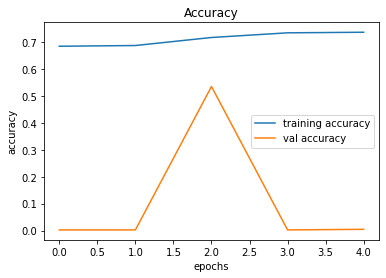

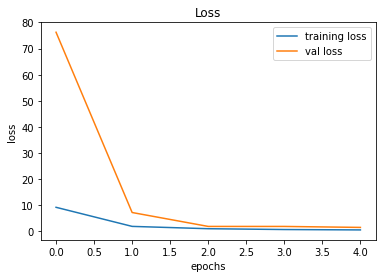

In [19]:
import seaborn as sns
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

We will be using the Adam optimizer, CategoricalCrossentropy as our loss function and accuracy as the metric throughout

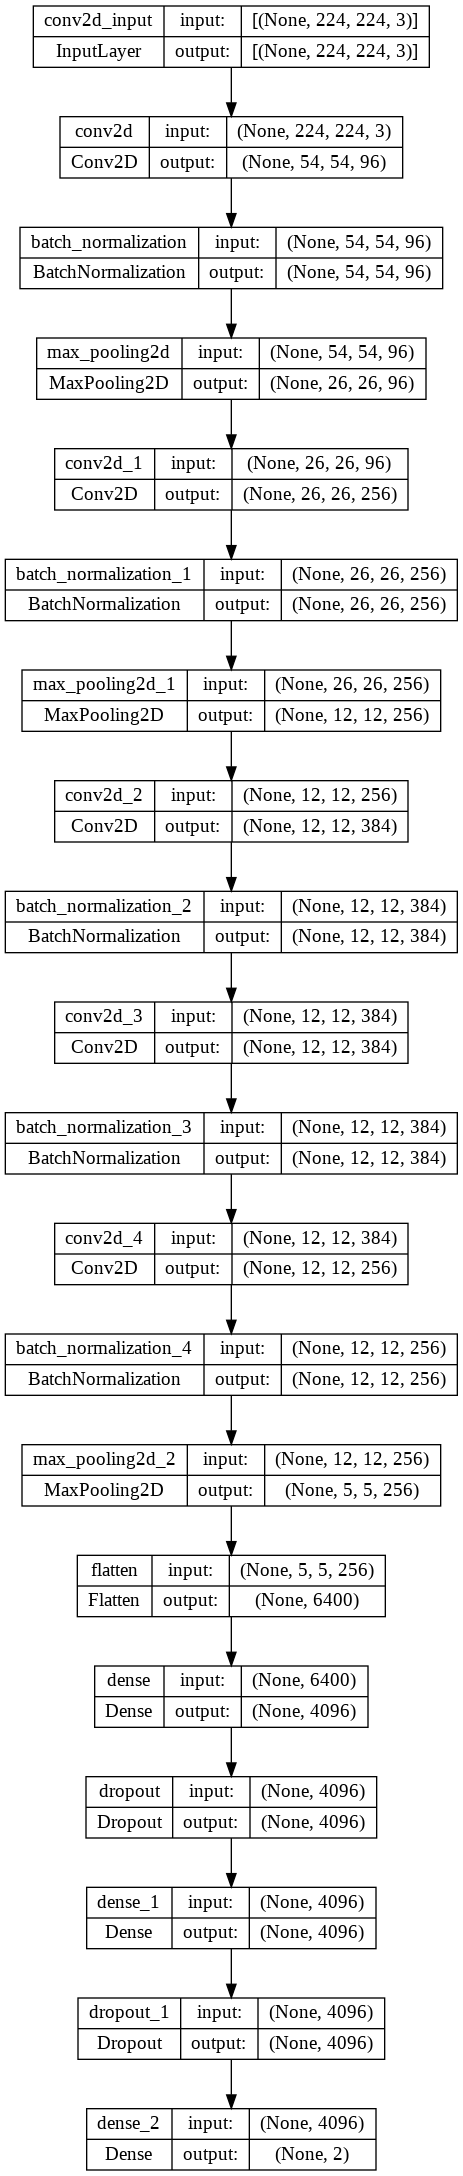

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

**Adjusting hypermeters like learning rate, no of layers, including regularization etc**

Adding l1 regularization

In [21]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu', kernel_regularizer=tf.keras.regularizers.l1()),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu', kernel_regularizer=tf.keras.regularizers.l1()),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_5 (Batc  (None, 54, 54, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_6 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                                      

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_generator, batch_size=32, epochs=3, validation_data=validation_generator)

Epoch 1/3
93/93 [==============================] - 811s 9s/step - loss: 790.9061 - accuracy: 0.7298 - val_loss: 56.6204 - val_accuracy: 0.0000e+00
Epoch 2/3
93/93 [==============================] - 796s 9s/step - loss: 51.8595 - accuracy: 0.7211 - val_loss: 51.5565 - val_accuracy: 0.0000e+00
Epoch 3/3
93/93 [==============================] - 797s 9s/step - loss: 50.2094 - accuracy: 0.7048 - val_loss: 50.4734 - val_accuracy: 0.0000e+00


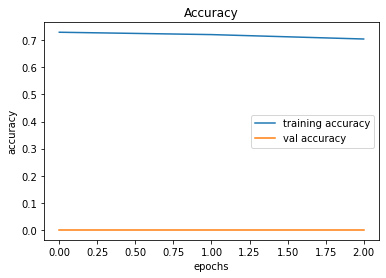

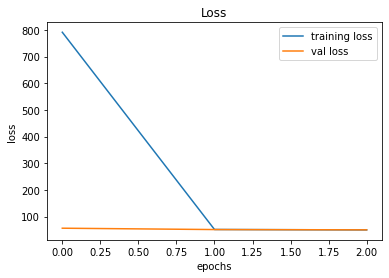

In [24]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Adding certain learning rate

In [25]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_10 (Bat  (None, 54, 54, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_11 (Bat  (None, 26, 26, 256)      1024      
 chNormalization)                                                
                                                      

In [26]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(
                    learning_rate=0.001,
                    beta_1=0.9,
                    beta_2=0.999,
                    epsilon=1e-07,
                    amsgrad=False,
                    name='Adam'
                ), metrics=['accuracy'])
history = model.fit(train_generator, batch_size=32, epochs=3, validation_data=validation_generator)

Epoch 1/3
93/93 [==============================] - 807s 9s/step - loss: 7.6306 - accuracy: 0.6717 - val_loss: 4.8154 - val_accuracy: 0.1356
Epoch 2/3
93/93 [==============================] - 780s 8s/step - loss: 2.3679 - accuracy: 0.6837 - val_loss: 4.2726 - val_accuracy: 0.0067
Epoch 3/3
93/93 [==============================] - 792s 9s/step - loss: 2.4437 - accuracy: 0.7010 - val_loss: 2.2142 - val_accuracy: 0.0000e+00


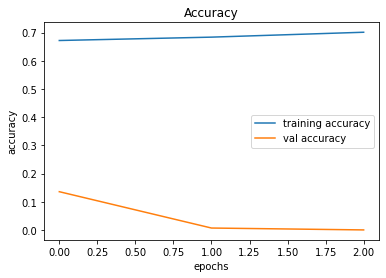

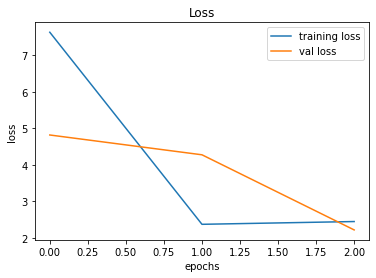

In [27]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Changing the no. of hidden layers

In [28]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_15 (Bat  (None, 54, 54, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 384)       332160    
                                                                 
 batch_normalization_16 (Bat  (None, 26, 26, 384)      1536      
 chNormalization)                                                
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_generator, batch_size=32, epochs=3, validation_data=validation_generator)

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Using VGGNet_16

In [ ]:
width, height = 224, 224

In [ ]:
base_model = keras.applications.vgg16.VGG16(
    include_top=False, input_shape=(width, height, 3))
 
layer_names = [
    'block1_pool',
    'block2_pool',
    'block3_pool',
    'block4_pool',
    'block5_pool',
]
base_model_outputs = [base_model.get_layer(
    name).output for name in layer_names]
base_model.trainable = False
 
VGG_16 = tf.keras.models.Model(base_model.input,
                               base_model_outputs)

In [ ]:
def fcn8_decoder(convs, n_classes):
    f1, f2, f3, f4, p5 = convs
 
    n = 4096
    c6 = tf.keras.layers.Conv2D(
        n, (7, 7), activation='relu', padding='same',
      name="conv6")(p5)
    c7 = tf.keras.layers.Conv2D(
        n, (1, 1), activation='relu', padding='same',
      name="conv7")(c6)
 
    f5 = c7
 
    # upsample the output of the encoder
    # then crop extra pixels that were introduced
    o = tf.keras.layers.Conv2DTranspose(n_classes, kernel_size=(
        4, 4),  strides=(2, 2), use_bias=False)(f5)
    o = tf.keras.layers.Cropping2D(cropping=(1, 1))(o)
 
    # load the pool 4 prediction and do a 1x1
    # convolution to reshape it to the same shape of `o` above
    o2 = f4
    o2 = (tf.keras.layers.Conv2D(n_classes, (1, 1),
                                 activation='relu',
                                 padding='same'))(o2)
 
    # add the results of the upsampling and pool 4 prediction
    o = tf.keras.layers.Add()([o, o2])
 
    # upsample the resulting tensor of the operation you just did
    o = (tf.keras.layers.Conv2DTranspose(
        n_classes, kernel_size=(4, 4),  strides=(2, 2),
      use_bias=False))(o)
    o = tf.keras.layers.Cropping2D(cropping=(1, 1))(o)
 
    # load the pool 3 prediction and do a 1x1
    # convolution to reshape it to the same shape of `o` above
    o2 = f3
    o2 = (tf.keras.layers.Conv2D(n_classes, (1, 1),
                                 activation='relu',
                                 padding='same'))(o2)
 
    # add the results of the upsampling and pool 3 prediction
    o = tf.keras.layers.Add()([o, o2])
 
    # upsample up to the size of the original image
    o = tf.keras.layers.Conv2DTranspose(
        n_classes, kernel_size=(8, 8),  strides=(8, 8),
      use_bias=False)(o)
 
    # append a softmax to get the class probabilities
    o = tf.keras.layers.Activation('softmax')(o)
    return o

In [ ]:
def segmentation_model():
 
    inputs = keras.layers.Input(shape=(width, height, 3))
    convs = VGG_16(inputs)
    outputs = fcn8_decoder(convs, 3)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
 
    return model
 
 
opt = keras.optimizers.Adam()
 
model = segmentation_model()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_17 (Functional)          [(None, 112, 112, 6  14714688    ['input_15[0][0]']               
                                4),                                                               
                                 (None, 56, 56, 128                                               
                                ),                                                                
                                 (None, 28, 28, 256                                        

Creating prediction masks

In [ ]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]
 
 
def show_predictions(dataset=None, num=1):
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display_images([image[0], mask[0], create_mask(pred_mask)])
    else:
        display_images([sample_image, sample_mask,
                        create_mask(model.predict(sample_image[tf.newaxis, ...]))])
 

In [ ]:
EPOCHS = 20
model_history = model.fit(X_train, epochs=EPOCHS,
                          steps_per_epoch=25,
                          validation_data=(X_test,y_test))

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
sns.set_style("darkgrid")
#get the details form the history object
acc = history.history['acc']
val_acc = history.history['acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(rmse) + 1)



#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()